# Trabajo de evalucación clustering y dimensionalidad

Se propone realizar un estudio de **distintos algoritmos de clusterización sobre el conjunto de datos de Spotify** empleado en el IAProject.

Justificar mediante métricas y gráficas la mejor solución posible, **mínimo dos modelos distintos**.

Por otro lado, **si se prefiere**, se puede realizar un estudio de **feature extraction** y **feature selection** sobre el dataset.

Se puede elegir entre dimensionalidad o clustering, o unir ambos.


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix


# Data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,Id
0,0.896,0.691,1,-7.403,1,0.369,0.01180,0.000,0.0883,0.6650,...,spotify:track:1lKQIxQDnLKoFhNWwMFiho,https://api.spotify.com/v1/tracks/1lKQIxQDnLKo...,https://api.spotify.com/v1/audio-analysis/1lKQ...,152398,4,Underground Rap,First Day Out,NaN,NaN,6863
1,0.432,0.962,2,-5.834,1,0.130,0.00193,0.162,0.6300,0.1240,...,spotify:track:6xyHjM4VecIRZDUldiiBA5,https://api.spotify.com/v1/tracks/6xyHjM4VecIR...,https://api.spotify.com/v1/audio-analysis/6xyH...,219085,4,trance,NaN,8997.0,Uplifting | Trance,30452
2,0.686,0.692,0,-5.573,0,0.323,0.48200,0.000,0.1690,0.6490,...,spotify:track:1rZvU5sb2E8LuJTAqEdAiw,https://api.spotify.com/v1/tracks/1rZvU5sb2E8L...,https://api.spotify.com/v1/audio-analysis/1rZv...,269357,3,Underground Rap,Funky Ho'$,NaN,NaN,8111
3,0.441,0.891,7,-2.873,0,0.037,0.01770,0.815,0.1840,0.0353,...,spotify:track:1TDjiNBekgMInzoNZxYi0D,https://api.spotify.com/v1/tracks/1TDjiNBekgMI...,https://api.spotify.com/v1/audio-analysis/1TDj...,319851,4,dnb,NaN,15264.0,Liquid Drum & Bass,36665
4,0.376,0.876,4,-2.695,0,0.101,0.03450,0.000,0.1250,0.2500,...,spotify:track:79fspqGOIP7FInu1elXhVX,https://api.spotify.com/v1/tracks/79fspqGOIP7F...,https://api.spotify.com/v1/audio-analysis/79fs...,222442,4,Dark Trap,Miss U,NaN,NaN,4428


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33844 entries, 0 to 33843
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      33844 non-null  float64
 1   energy            33844 non-null  float64
 2   key               33844 non-null  int64  
 3   loudness          33844 non-null  float64
 4   mode              33844 non-null  int64  
 5   speechiness       33844 non-null  float64
 6   acousticness      33844 non-null  float64
 7   instrumentalness  33844 non-null  float64
 8   liveness          33844 non-null  float64
 9   valence           33844 non-null  float64
 10  tempo             33844 non-null  float64
 11  type              33844 non-null  object 
 12  id                33844 non-null  object 
 13  uri               33844 non-null  object 
 14  track_href        33844 non-null  object 
 15  analysis_url      33844 non-null  object 
 16  duration_ms       33844 non-null  int64 

Lo primero que haremos sera eliminar todas aquellas características que no aportan ningun valor a este ejercicio de clustering

In [5]:
data = data.drop(['uri', 'track_href', 'analysis_url', 'Unnamed: 0', 'title', 'id', 'Id', 'song_name', 'type'], axis =1)

In [6]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.896,0.691,1,-7.403,1,0.369,0.01180,0.000,0.0883,0.6650,189.880,152398,4,Underground Rap
1,0.432,0.962,2,-5.834,1,0.130,0.00193,0.162,0.6300,0.1240,138.010,219085,4,trance
2,0.686,0.692,0,-5.573,0,0.323,0.48200,0.000,0.1690,0.6490,173.780,269357,3,Underground Rap
3,0.441,0.891,7,-2.873,0,0.037,0.01770,0.815,0.1840,0.0353,175.007,319851,4,dnb
4,0.376,0.876,4,-2.695,0,0.101,0.03450,0.000,0.1250,0.2500,202.082,222442,4,Dark Trap


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33844 entries, 0 to 33843
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      33844 non-null  float64
 1   energy            33844 non-null  float64
 2   key               33844 non-null  int64  
 3   loudness          33844 non-null  float64
 4   mode              33844 non-null  int64  
 5   speechiness       33844 non-null  float64
 6   acousticness      33844 non-null  float64
 7   instrumentalness  33844 non-null  float64
 8   liveness          33844 non-null  float64
 9   valence           33844 non-null  float64
 10  tempo             33844 non-null  float64
 11  duration_ms       33844 non-null  int64  
 12  time_signature    33844 non-null  int64  
 13  genre             33844 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 3.6+ MB


In [8]:
data['genre'].value_counts()

genre
Underground Rap    4683
Dark Trap          3608
trance             2437
Hiphop             2407
techhouse          2407
trap               2405
dnb                2367
techno             2366
psytrance          2363
hardstyle          2317
RnB                1703
Trap Metal         1572
Rap                1507
Emo                1339
Pop                 363
Name: count, dtype: int64

In [9]:
len(data['genre'].value_counts())

15

In [10]:
data.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

## Escalado y Encoding

In [11]:
X = data.drop('genre', axis=1)
y = data['genre']

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
genre_label_encoder = LabelEncoder()
data['genre'] = genre_label_encoder.fit_transform(data['genre'])

# Clustering

## K-Means

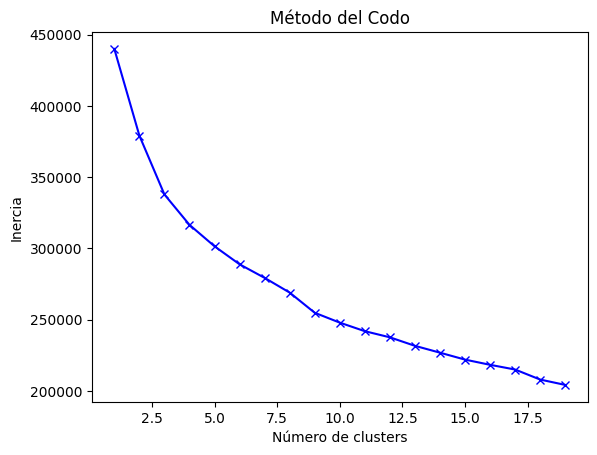

In [14]:
inertia = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


Segun el metodo del codo ajustamos el numero de clusters a 9

In [15]:
kmeans = KMeans(n_clusters=9, random_state=42)  # Ajusta n_clusters según el método del codo
kmeans.fit(X)

data['Cluster KMeans'] = kmeans.labels_

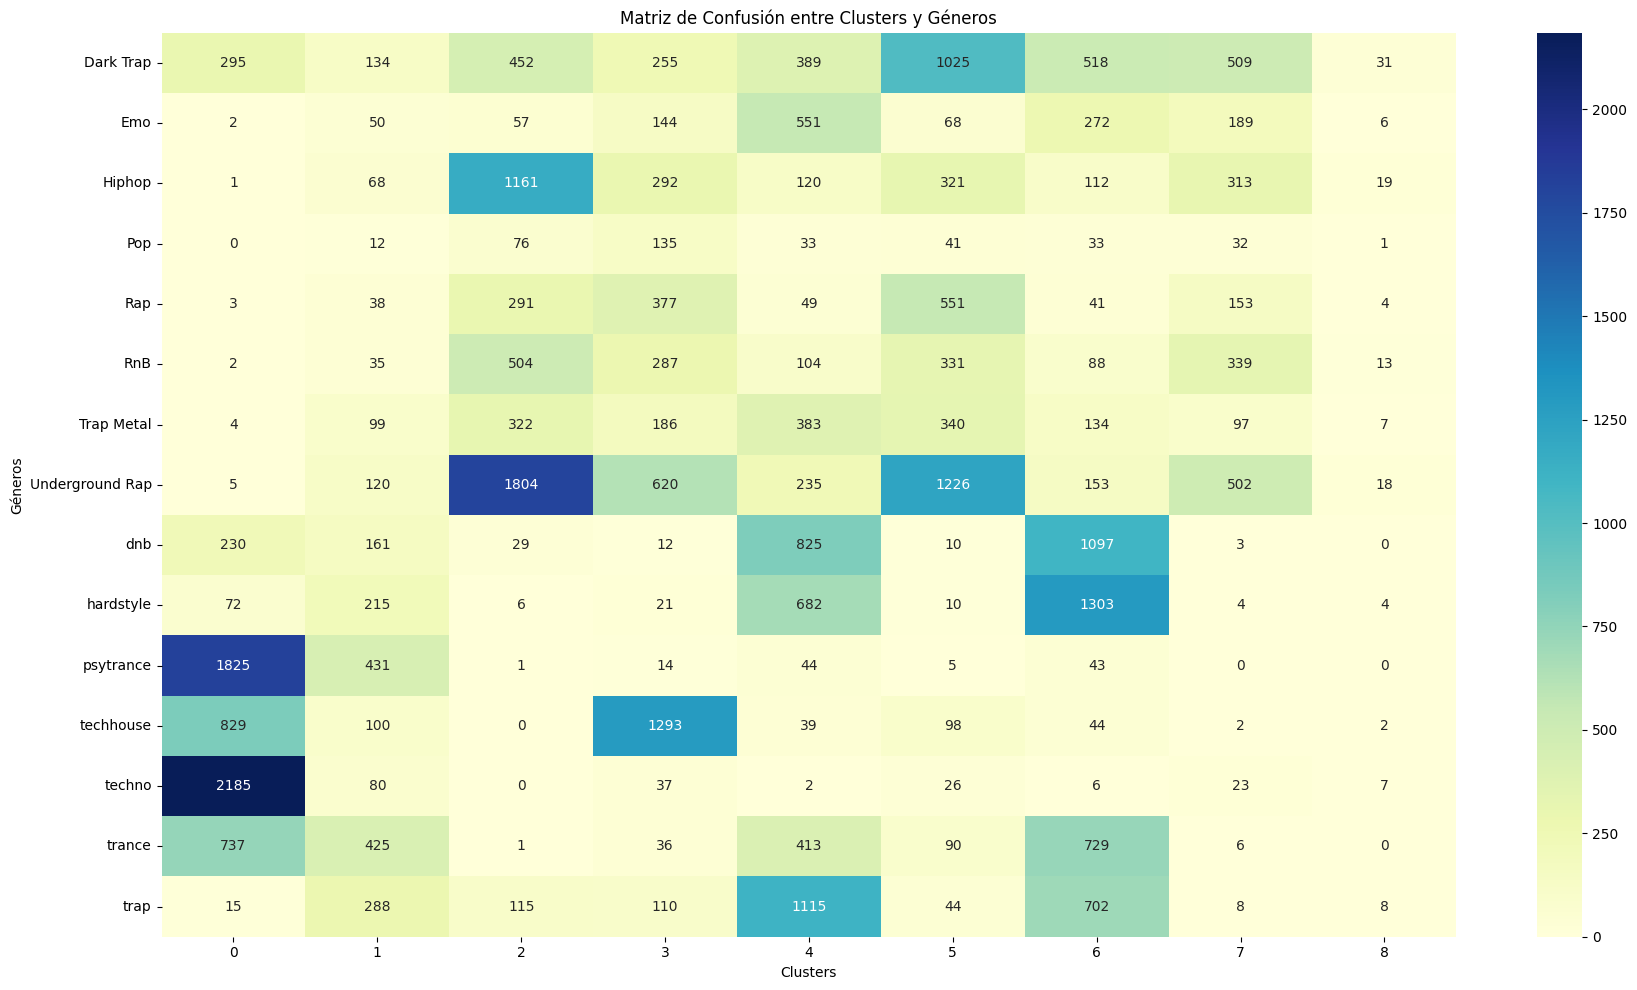

In [16]:
# Calcular la matriz de confusión
crosstab = pd.crosstab(genre_label_encoder.inverse_transform(data['genre']), data['Cluster KMeans'])

# Plotear el heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')

# Plot
# plt.figure(figsize=(14, 10))
# sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Clusters')
plt.ylabel('Géneros')
plt.title('Matriz de Confusión entre Clusters y Géneros')
plt.tight_layout()
plt.show()


Viendo los cluesters que se han hecho no podemos sacar ninguna conclusion clara. Los clusters no son únicos de cada género asi mismo, hay géneros que tienen una importante presencia en varios clusters.

## DBSCAN

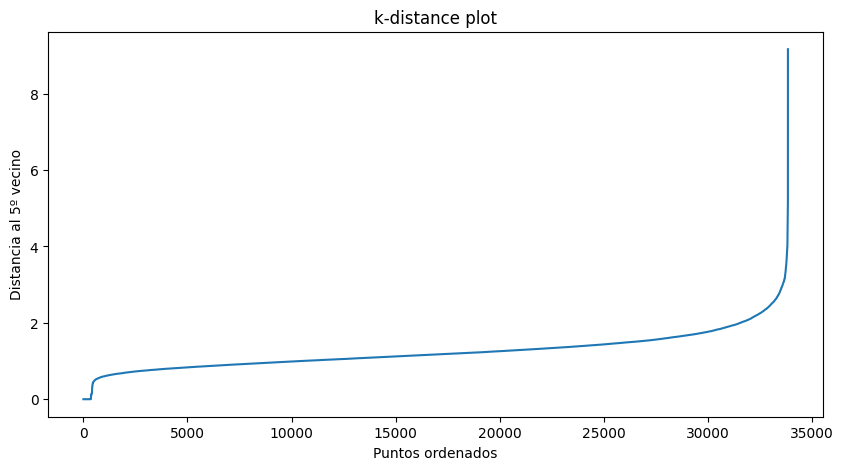

In [17]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)  # n_neighbors = min_samples
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenamos las distancias
distances = np.sort(distances[:, 4])  # 4 = n_neighbors-1
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('k-distance plot')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 5º vecino')
plt.show()


In [18]:
dbscan = DBSCAN(eps=2.5, min_samples=5)  # Puedes ajustar los parámetros
dbscan.fit(X)

# Agregar los labels al DataFrame
data['Cluster DBSCAN'] = dbscan.labels_

In [25]:
data['Cluster DBSCAN'].value_counts()

Cluster DBSCAN
 0    32220
 1      859
-1      406
 2      314
 3       30
 4        8
 5        7
Name: count, dtype: int64

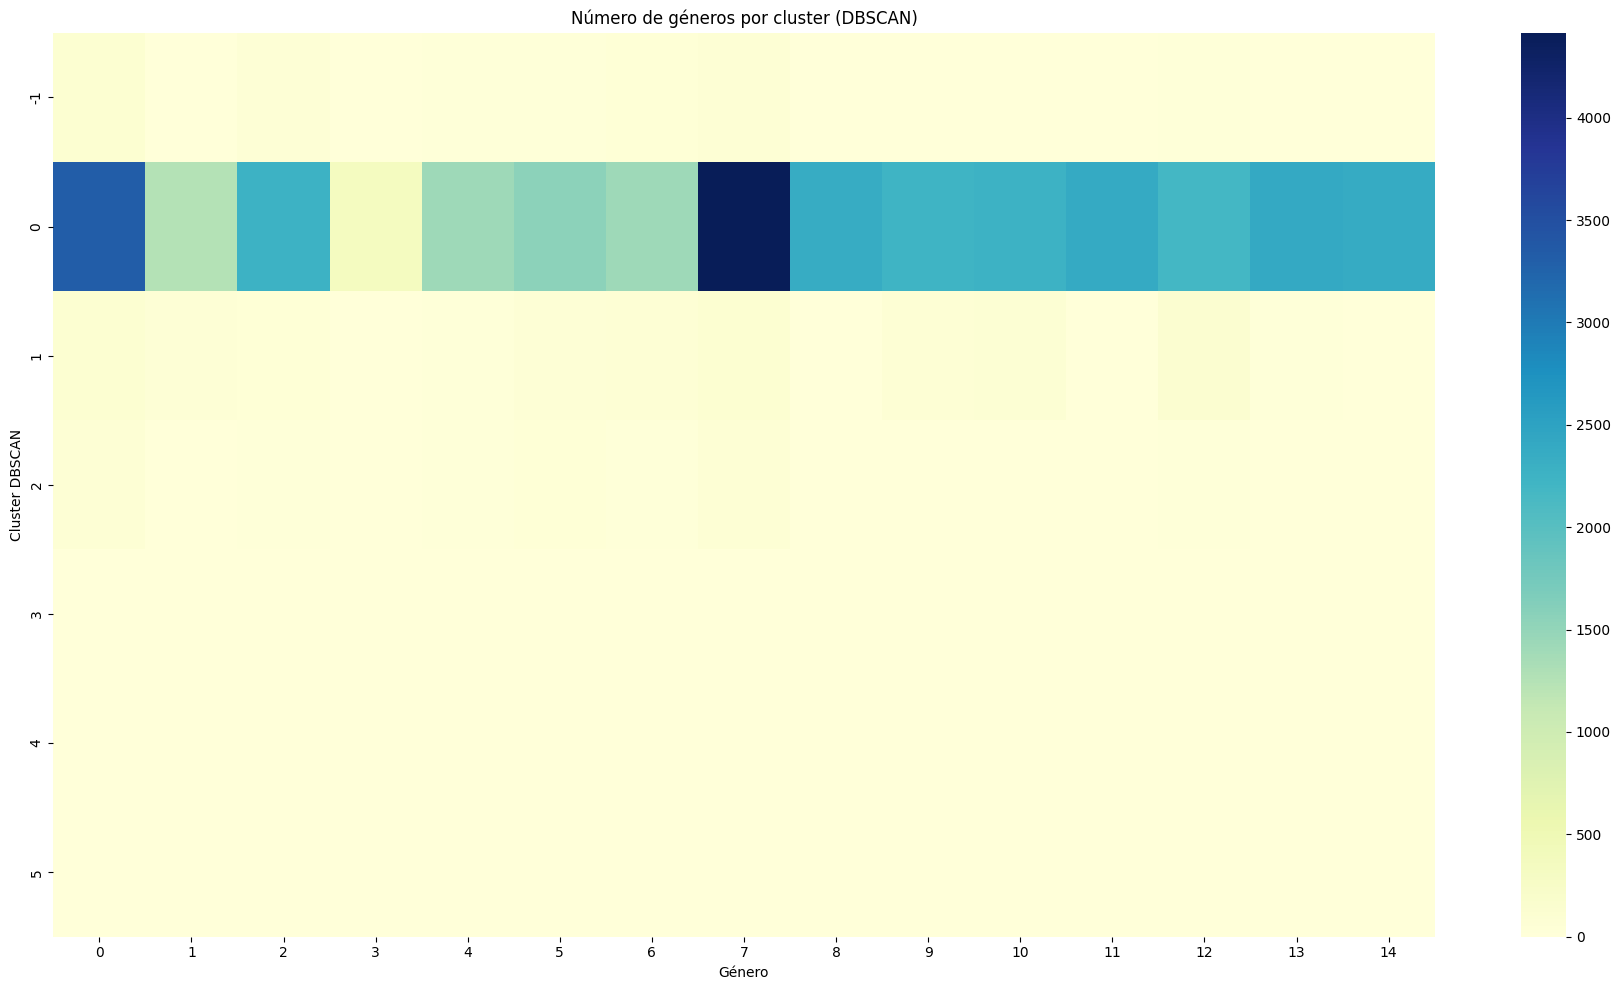

In [20]:
# Crear la tabla cruzada
crosstab = pd.crosstab(data['Cluster DBSCAN'], data['genre'])

# Plotear el heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(crosstab, annot=False, cmap='YlGnBu')

plt.xlabel('Género')
plt.ylabel('Cluster DBSCAN')
plt.title('Número de géneros por cluster (DBSCAN)')
plt.tight_layout()
plt.show()

Aun probando con distintos valores de epsilon, DBSCAN no nos propociona un resultado claro. Esto se puede deber a que no hay una separación clara entre géneros y todos permanecen bastante juntos en el multiespcacio.

# Reducción de dimensionalidad

## PCA

In [ ]:
pca = PCA(n_components=2)  # Para visualizar en 2D
X_pca = pca.fit_transform(X)

# Opcional: Ver cuánto varianza explican los componentes
print(f'Varianza explicada: {pca.explained_variance_ratio_.sum():.2f}')


Varianza explicada: 0.35


In [ ]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame con los PCA y género
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Genre': genre_label_encoder.inverse_transform(data['genre'])
})

# Plotly scatter plot
fig = px.scatter(pca_df, x='PCA1', y='PCA2', color='Genre',
                 title='Clusters DBSCAN Visualizados con PCA',
                 hover_data=['Genre'])

fig.update_layout(legend_title_text='Género')

fig.show()


Hemos utilizado PCA para reducir las dimensiones a dos para mostrar un plot. Vemos que los géneros permanecen juntos en el espacio de dos dimensiones.
Los géneros ritmicos como house psytrance y techno se agrupan mas a la derecha mientras que generos como el rap que tienen más voces se agrupan más en la parte izquierda.